# Zhenfeng Liang

# MTH9875 Homework 9

Assigned: October 29, 2015.
Due: November 12, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### As usual, download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

source("BlackScholes.R")
source("Heston2.R")

## A special case of Heston: The Heston-Nandi model
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

If we believe the argument of Lecture 4 preceding formula (21), if $\rho=\pm1$, Heston local variance should be well approximated by (*e.g.* (4.1) on page 44 of The Volatility Surface):

<a name="eq:Hestonlv"></a>(1)
$$
\beas
 v_L(x_T,T) &=& \left[\hat v'_{ T} \,-\, \eta
 \,\frac{{x_T }}{{w_T }}\,\int_0^T {\hat v_s } \,e^{
 - \lambda '(T - s)} ds \right]^+\nonumber\\
 &=&\left[(v-\bar v') e^{ - \lambda' T} +\bar v' \,-\,\eta \, x_T
 \,\left\{ \frac{1-e^{-\lambda' T}}{\lambda' T } \right\}\right]^+
\eeas
$$

with $ \lambda ' = \lambda  +\frac { \eta}{2}$, $\bar v' = \bar v
\frac {\lambda }  {\lambda '}$.  The whole expression must be
bounded below by zero - all stock prices above the critical stock
price at which the local variance reaches zero are unattainable.







Following Chapter 4 of The
Volatility Surface, we will show this numerically by simulation.  For each of the problems below, take $T=1$ year as the time horizon with Heston parameters:
\begin{eqnarray*}
v&=& 0.04\\ \bar v &=& 0.04\\ \lambda&=&10\\ \eta&=&1\\\rho&=&-1.
\end{eqnarray*}



### 1. (16 points)

(a)

Use your Monte Carlo code (not QMC!) from HW6 Problem 4 to return vectors of $x=\log S_T/S_0$ and instantaneous variance $v$ with the above Heston-Nandi parameters.  Run the code with $N=2,000,000$ paths, $m=64$ (128 steps), and *evolve=evolveAlfonsiF* .  (Tip: Save the results so you can reuse these samples of $x$ and $v$ and avoid lengthy reruns of the MC code.)

(b)

Plot the Heston-Nandi 1-year implied variance smile for log-strikes between $-1.0$ and $1.0$.  Superimpose the implied volatility smile from the Heston quasi-closed form formula.  As usual, nice formatting please!

(c)

Consider the surface SVI (SSVI) parameterization

<a name="eq:ssvi"></a>(2)
$$
w(k,\theta_t)
= \frac{\theta_t}{2}\left\{1+\rho\varphi(\theta_t) k + \sqrt{\left(\varphi(\theta_t){k}+\rho\right)^2
+(1-\rho^2 )}\right\}.
$$

Set $t=1$.  Show that the ATM implied variance $\sigma_{\text{BS}}^2(0,1) = \theta$, and that the ATM variance skew $\p_k \sigma_{\text{BS}}^2(k,1)|_{k=0}= \rho\,\theta\,\varphi$.

(d)

Simplify the SSVI formula [(2)](#eq:ssvi) in the special case where $\rho=-1$. 

(e)

Estimate the Monte Carlo ATM implied variance level and skew.  Assuming $\rho=-1$, deduce $\theta$ and $\varphi$.  Display the resulting SSVI fit on the plot obtained in part (b).  

### Solution 1

### (a)

In [2]:
evolveAlfonsiF <- function(v,x,dt,W1,W2){

        #Variance process
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

MCEvolveXnV <- function(params){
    
    res <- function(S0, T, N, m, evolve)
    {
        lambda <<- params$lambda;
        rho <<- params$rho;
        eta <<- params$eta;
        vbar <<- params$vbar;
        v0 <<- params$v;
  
        n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
        rho2m1 <<- sqrt(1-rho*rho);
        vbarp <<- vbar - eta^2/(4*lambda);
     
        # We use a vertical array, one element per M.C. path
        x <- rep(0,N); v <- rep(1,N)*v0;
    
        # Loop for bias computation (N small, n big)
        dt = T / n;
        
        eldt2 <<- exp(-lambda*dt/2);
        psi <<- (1-eldt2)/lambda;
        
        for (i in 1:n)
        {
            W1 <- rnorm(N);
            W2 <- rnorm(N);
            W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
            W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
            
            # Now W1 and W2 are forced to have mean=0 and sd=1
            W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
            W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
            # Now W1 and W2 have mean=0, sd=1 and correlation=0
    
            res <- evolve(v,x,dt,W1,W2);
            x <- res[,1];
            v <- res[,2];    
        }
        
        return(cbind(x,v));
    }

    return(res)
}

In [3]:
# Initialization
paramsHN <- list(lambda=10, rho=-1, eta=1, v=0.04, vbar=0.04);
S0 = 1.0
T = 1.0
N = 2000000
m = 64

In [4]:
xnv = MCEvolveXnV(paramsHN)(S0=S0, T=T, N=N, m=m, evolve=evolveAlfonsiF);

In [5]:
head(xnv)

x,v
-0.08901446,0.08666620
0.05644704,0.04338119
0.04976062,0.06705393
0.218385987,0.002898957
-0.22196180,0.07639213
0.185982391,0.003649205


### (b)

In [6]:
MCHNCall <- function(kVec, xVec)
{
    # r = 0, q =0, T = 1.0
    
    SVec <- exp(xVec);
    KVec <- exp(kVec);
    M <- length(KVec);
    
    callPrice <- numeric(M);
    iVol <- numeric(M);
    
    for(i in 1:M)
    {
        K <- KVec[i];
        V <- (SVec>K)*(SVec - K); # Boundary condition for European call
        callPrice[i] <- mean(V);
        iVol[i] <- BSImpliedVolCall(1.0, K, 1.0, 0, callPrice[i])
    }
    
    return(cbind(callPrice, iVol));
}

impvolHestonClosedForm <- function(kVec){sapply(kVec, function(k){impvolHeston(paramsHN)(k, T)})}

In [7]:
kVec <- seq(-1.0,1.0,0.01)
mcCallPnV <- MCHNCall(kVec, xnv[,1])
iVolHeston <- impvolHestonClosedForm(kVec)

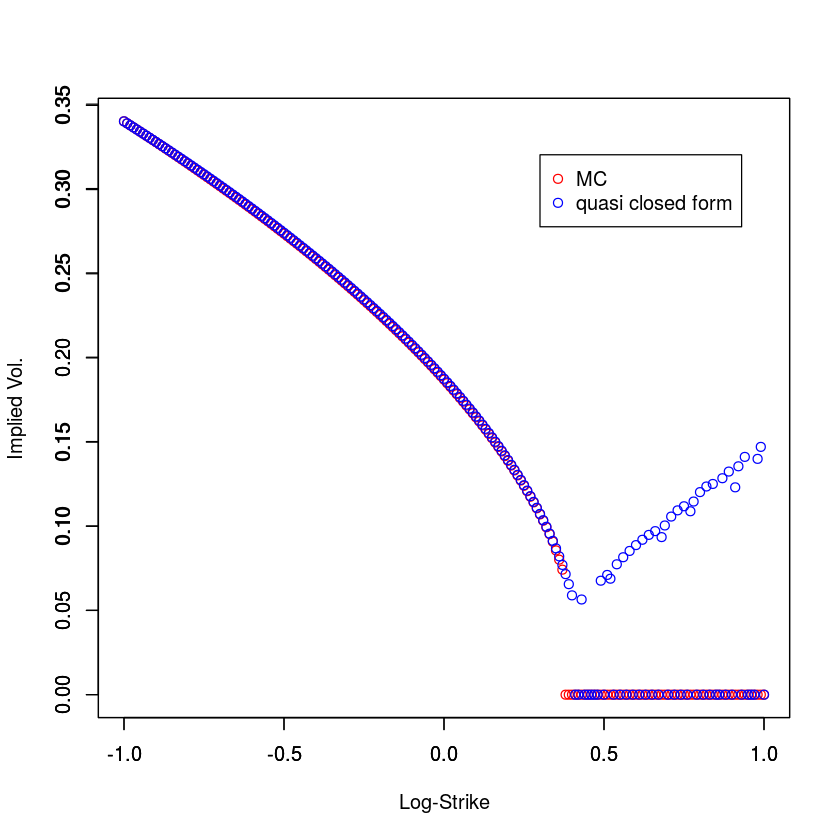

In [8]:
plot(kVec,mcCallPnV[,2],col="red",xlab="Log-Strike",ylab="Implied Vol.");
par(new=T)
plot(kVec,iVolHeston,col="blue", xlab=NA, ylab=NA);
leg.txt=c('MC', 'quasi closed form')
legend(x=0.3, y=0.32,leg.txt, pch=c(1,1),col=c("red","blue"))

### (c)

Plug $k = 0$ and $\theta = 1$ into the formula,
$$
\sigma_{BS}^2(0,1) = \theta / 2 (1 + \sqrt{\rho^2 + (1 - \rho^2)}) = \theta
$$

Take partial derivative w.r.t $k$, we have,
\begin{eqnarray}
\partial_k\,\sigma_{BS}^2(k,1) = \frac{\theta}{2}(\rho\,\varphi + \frac12\left(\varphi(\theta_t){k}+\rho\right)^2
+(1-\rho^2 ))^{-0.5}\,2(\varphi\,k + \rho)\varphi ) 
\end{eqnarray}

Let $k=0$
$$
\partial_k\,\sigma_{BS}^2(k,1)|_{k=0} = \frac{\theta}{2}(\rho\,\varphi + \rho\,\varphi) = \rho\,\theta\,\varphi
$$

### (d)

Plug $\rho = -1$ into the formula, we have,

$$
w(k,\theta_t)
= \frac{\theta_t}{2}\left\{1 - \varphi(\theta_t) k + \sqrt{\left(\varphi(\theta_t){k} - 1\right)^2
}\right\}
=
\begin{cases} 
      0 & \varphi(\theta_t){k} - 1 \geq 0 \\
      \theta_t(1 - \varphi(\theta_t) k) & otherwise
\end{cases}
$$


### (e)

In [9]:
ssviParams <- list()
ssviParams$rho <- -1

atmInd <- match(0, kVec)

# From the derivation above, we know the atm variance is theta is this SVI
ssviParams$theta <- mcCallPnV[atmInd, 2]^2
atmVarSkew <- (mcCallPnV[atmInd + 1, 2]^2 - mcCallPnV[atmInd - 1, 2]^2) / (kVec[atmInd + 1] - kVec[atmInd - 1])
ssviParams$phi <- atmVarSkew / (ssviParams$rho * ssviParams$theta)

cat("theta is", ssviParams$theta,"\nphi is", ssviParams$phi)

theta is 0.03501319 
phi is 2.257476

In [10]:
fitSSVI <- function(params)
{
    rho <- params$rho
    theta <- params$theta
    phi <- params$phi
    
    res <- function(k)
    {
        w <- theta / 2 * (1 + rho * phi * k + sqrt((phi * k + rho)^2 + (1 - rho^2)))        
        return(sqrt(w))        
    }
    
    return(res)
}

In [11]:
fit <- fitSSVI(ssviParams)

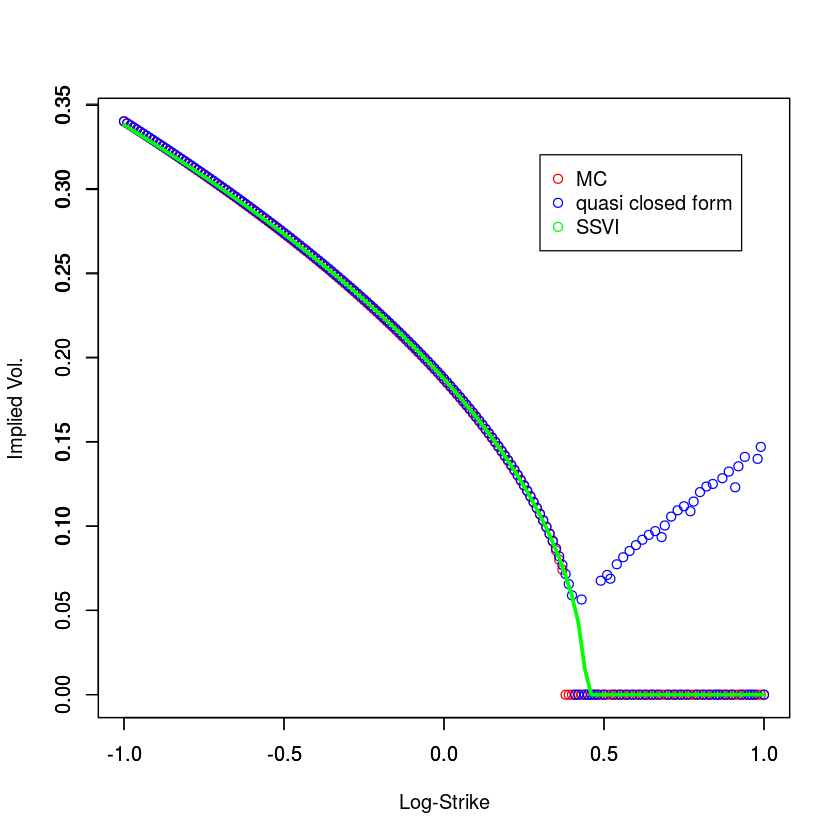

In [12]:
plot(kVec,mcCallPnV[,2],col="red",xlab="Log-Strike",ylab="Implied Vol.");
par(new=T)
plot(kVec,iVolHeston,col="blue", xlab=NA, ylab=NA);
curve(fit(x),from=-1.0,to=1.0,pch=1,col="green", lwd=3,add=TRUE)
leg.txt=c('MC', 'quasi closed form', 'SSVI')
legend(x=0.3, y=0.32,leg.txt, pch=1,col=c("red","blue", "green"))

### Numerical check of local volatility formula

### 2. (6 points) 

Using  the $x$ and $v$ samples you generated in Problem 1, numerically estimate the local volatility function

[(3)](#eq:lvNumerical)
$$
v_L(x,1)=\E[v_1|x_1=x]
$$

Plot local variance $v_L(x,1)$ as a function of $x$ from $x=-0.5$ to $x=+0.5$.  As in HW4, I recommend just binning the data.  Superimpose a graph of formula [(1)](#eq:Hestonlv).  Verify agreement of [(1)](#eq:Hestonlv) and [(3)](#eq:lvNumerical).

### Solution

In [13]:
interval <- 0.01

var_local <- function(x_in){

    xMin <- min(xnv[,1])
    ind <- floor((x_in  - xMin) / interval)
    LB <- xMin + ind * interval 
    UB <- LB + interval
    sub <- subset(xnv, xnv[,1] > LB &  xnv[,1] <= UB)
 
    return (mean(sub[,2]))
}

# Vectorize the implied vol function using Log Strike as input
var_local_vec <- function(x){sapply(x,function(k){var_local(k)})}

LVHN <- function(params)
{
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    lambdaP <- lambda + eta / 2
    vbarP <- vbar * lambda / lambdaP
    
    res <- function(xVec, T)
    {
        n <- length(xVec)
        if(T == 0)
        {
            return(rep(v0, n))
        }
        
        term1 <- (v0 - vbarP) * exp(-lambdaP * T) 
        term2 <- vbarP
        term3 <- eta * ((1 - exp(-lambdaP * T)) / (lambdaP * T)) * xVec
        
        res <- term1 + term2 - term3
        res <- (res > 0) * res 
        
        return(res)
    }
    
    return(res)
}


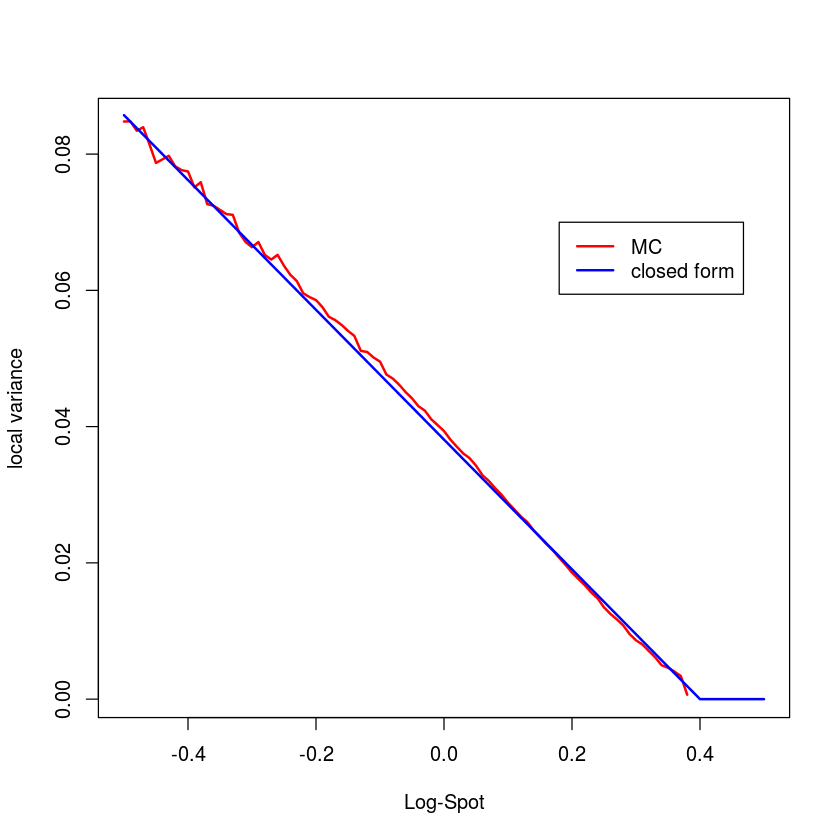

In [14]:
curve(var_local_vec(x),from=-0.5,to=0.5,col="red",lty=1,lwd=2,xlab="Log-Spot",ylab="local variance")
curve(LVHN(paramsHN)(x,1.0), from=-0.5,to=0.5,col="blue",lty=1,lwd=2,add=TRUE)
leg.txt <- c("MC","closed form")
legend(x=0.18, y=0.07, leg.txt,lty=1,lwd=2,col=c("red","blue"))

### Comments

As we can see, for $interval=0.01$, the MC local variance basically match with the closed form linear expression. The MC will fluctuate a little bit due to the interval inaccuracy.

## Local volatility simulation

### 3. (10 points) 

Amend the Monte Carlo code of Problem 1 to generate a vector of $x=\log S_T/S_0$ assuming the local volatility process:

$$
dx=-\frac{1}{2}\,v_L(x,t)\,dt+\sqrt{v_L(x,t)}\,dZ
$$

with the approximate formula [(1)](#eq:Hestonlv) for local variance.  Again, with 2 million paths and 128 steps, plot the 1-year volatility smile for log-strikes between $-1.0$ and $1.0$.  Superimpose this smile on the Heston implied volatility smiles generated in Problem 1.  

### Solution

In [15]:
calLVHNVec <- LVHN(paramsHN)
    
    
evolveHN <- function(x, t, dt, Z)
{
    
    vL <- calLVHNVec(x, t)
    vLdt <- vL * dt
    x <- x - 0.5 * vLdt + sqrt(vLdt) * Z
    x <- x - log(mean(exp(x)))
    
    return(x)
}

MCLVEvolveX <- function(params){
        
    res <- function(S0, T, N, m)
    {
  
        n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
     
        # We use a vertical array, one element per M.C. path
        x <- rep(0,N); 
        # Loop for bias computation (N small, n big)
        dt <- T / n;
        t <- 0;
        for (i in 1:n)
        {
            W1 <- rnorm(N);
        
            W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
            
            x <- evolveHN(x,t,dt,W1);
            t <- t + dt;
        }
        
        return(x);
    }

    return(res)
}

In [16]:
xByLV <- MCLVEvolveX(paramsHN)(S0=S0, T=T, N=N, m=m);

In [17]:
head(xByLV)

[1]  0.1787436  0.1443916 -0.2536936 -0.1856092 -0.1403089 -0.1871886

In [18]:
mcCallPnVByLV <- MCHNCall(kVec, xByLV)

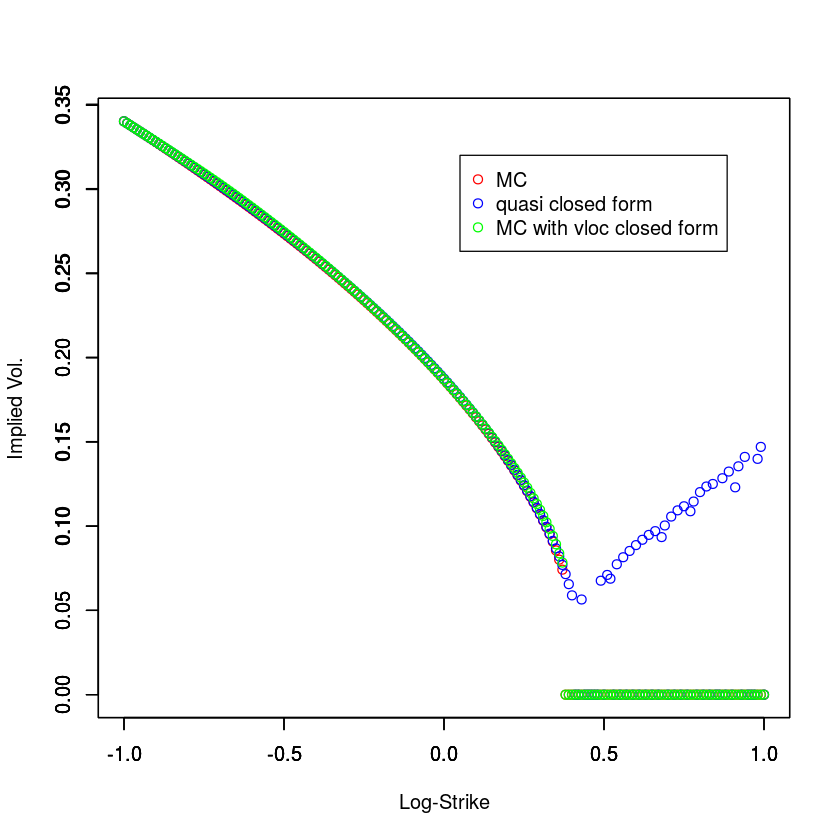

In [19]:
plot(kVec,mcCallPnV[,2],col="red",xlab="Log-Strike",ylab="Implied Vol.");
par(new=T)
plot(kVec,iVolHeston,col="blue", xlab=NA, ylab=NA);
par(new=T)
plot(kVec, mcCallPnVByLV[,2],col="green", xlab=NA,ylab=NA)
leg.txt=c('MC', 'quasi closed form', "MC with vloc closed form")
legend(x=0.05, y=0.32,leg.txt, pch=c(1,1,1),col=c("red","blue","green"))

## Intuition

### 4. (4 points) 


From the results of your computations, you should see that the local
volatility model and the stochastic volatility model price one year
European options almost identically.  Also, because  $\rho=-1$, both the Heston model of Problem 1 and the local volatility model of Problem 2 are only one-factor, depending only on stock prices. Are there any
differences between the two models? If so, what are these differences?

### Solution

### Comments

As we can see from the graph in problem 3, imp vol from stochastic volatility model(red circle) is almost on the top of those calculated from local volatility(green one) which means they price one year European options identically. From this perpective, they look the same. However, the two models are not equivalent. In the local volatility model, volatilities are known in advance and in the stochastic volatility case, volatilities are uncertain. This kind of difference will become more clear when we go to price some exotic options. In other words, to value an option, it's not enough just to fit all the European option prices, we also need to assume some specific dynamics for the underlying.  

## Postscript

You now have working Heston-Nandi stochastic volatility and local volatility codes.  We will use these later to check our intuition for the impact of dynamical assumptions on the pricing of exotic options.